In [3]:
import pandas as pd

# Assuming you've already loaded these DataFrames or you can load them from CSVs directly
df_gidnet = pd.read_csv('data_supremacy_cct/GidNET_v02_width_and_runtime_supremacy_cct_cycle_10_data.csv')
df_qnet = pd.read_csv('data_supremacy_cct/QNET_width_and_runtime_supremacy_cct_cycle_10_data.csv')
df_qiskit = pd.read_csv('data_supremacy_cct/Qiskit_width_and_runtime_supremacy_cct_cycle_10_data.csv')

# Merging the DataFrames on 'Circuit Sizes'
df_combined = pd.merge(df_gidnet, df_qnet, on='Circuit Sizes', how='outer', suffixes=('_gidnet', '_qnet'))
df_combined = pd.merge(df_combined, df_qiskit, on='Circuit Sizes', how='outer', suffixes=('', '_qiskit'))

# Save the combined DataFrame to CSV
df_combined.to_csv('data_supremacy_cct/combined_v02_width_and_runtime_supremacy_cct_cycle_10_data.csv', index=False)


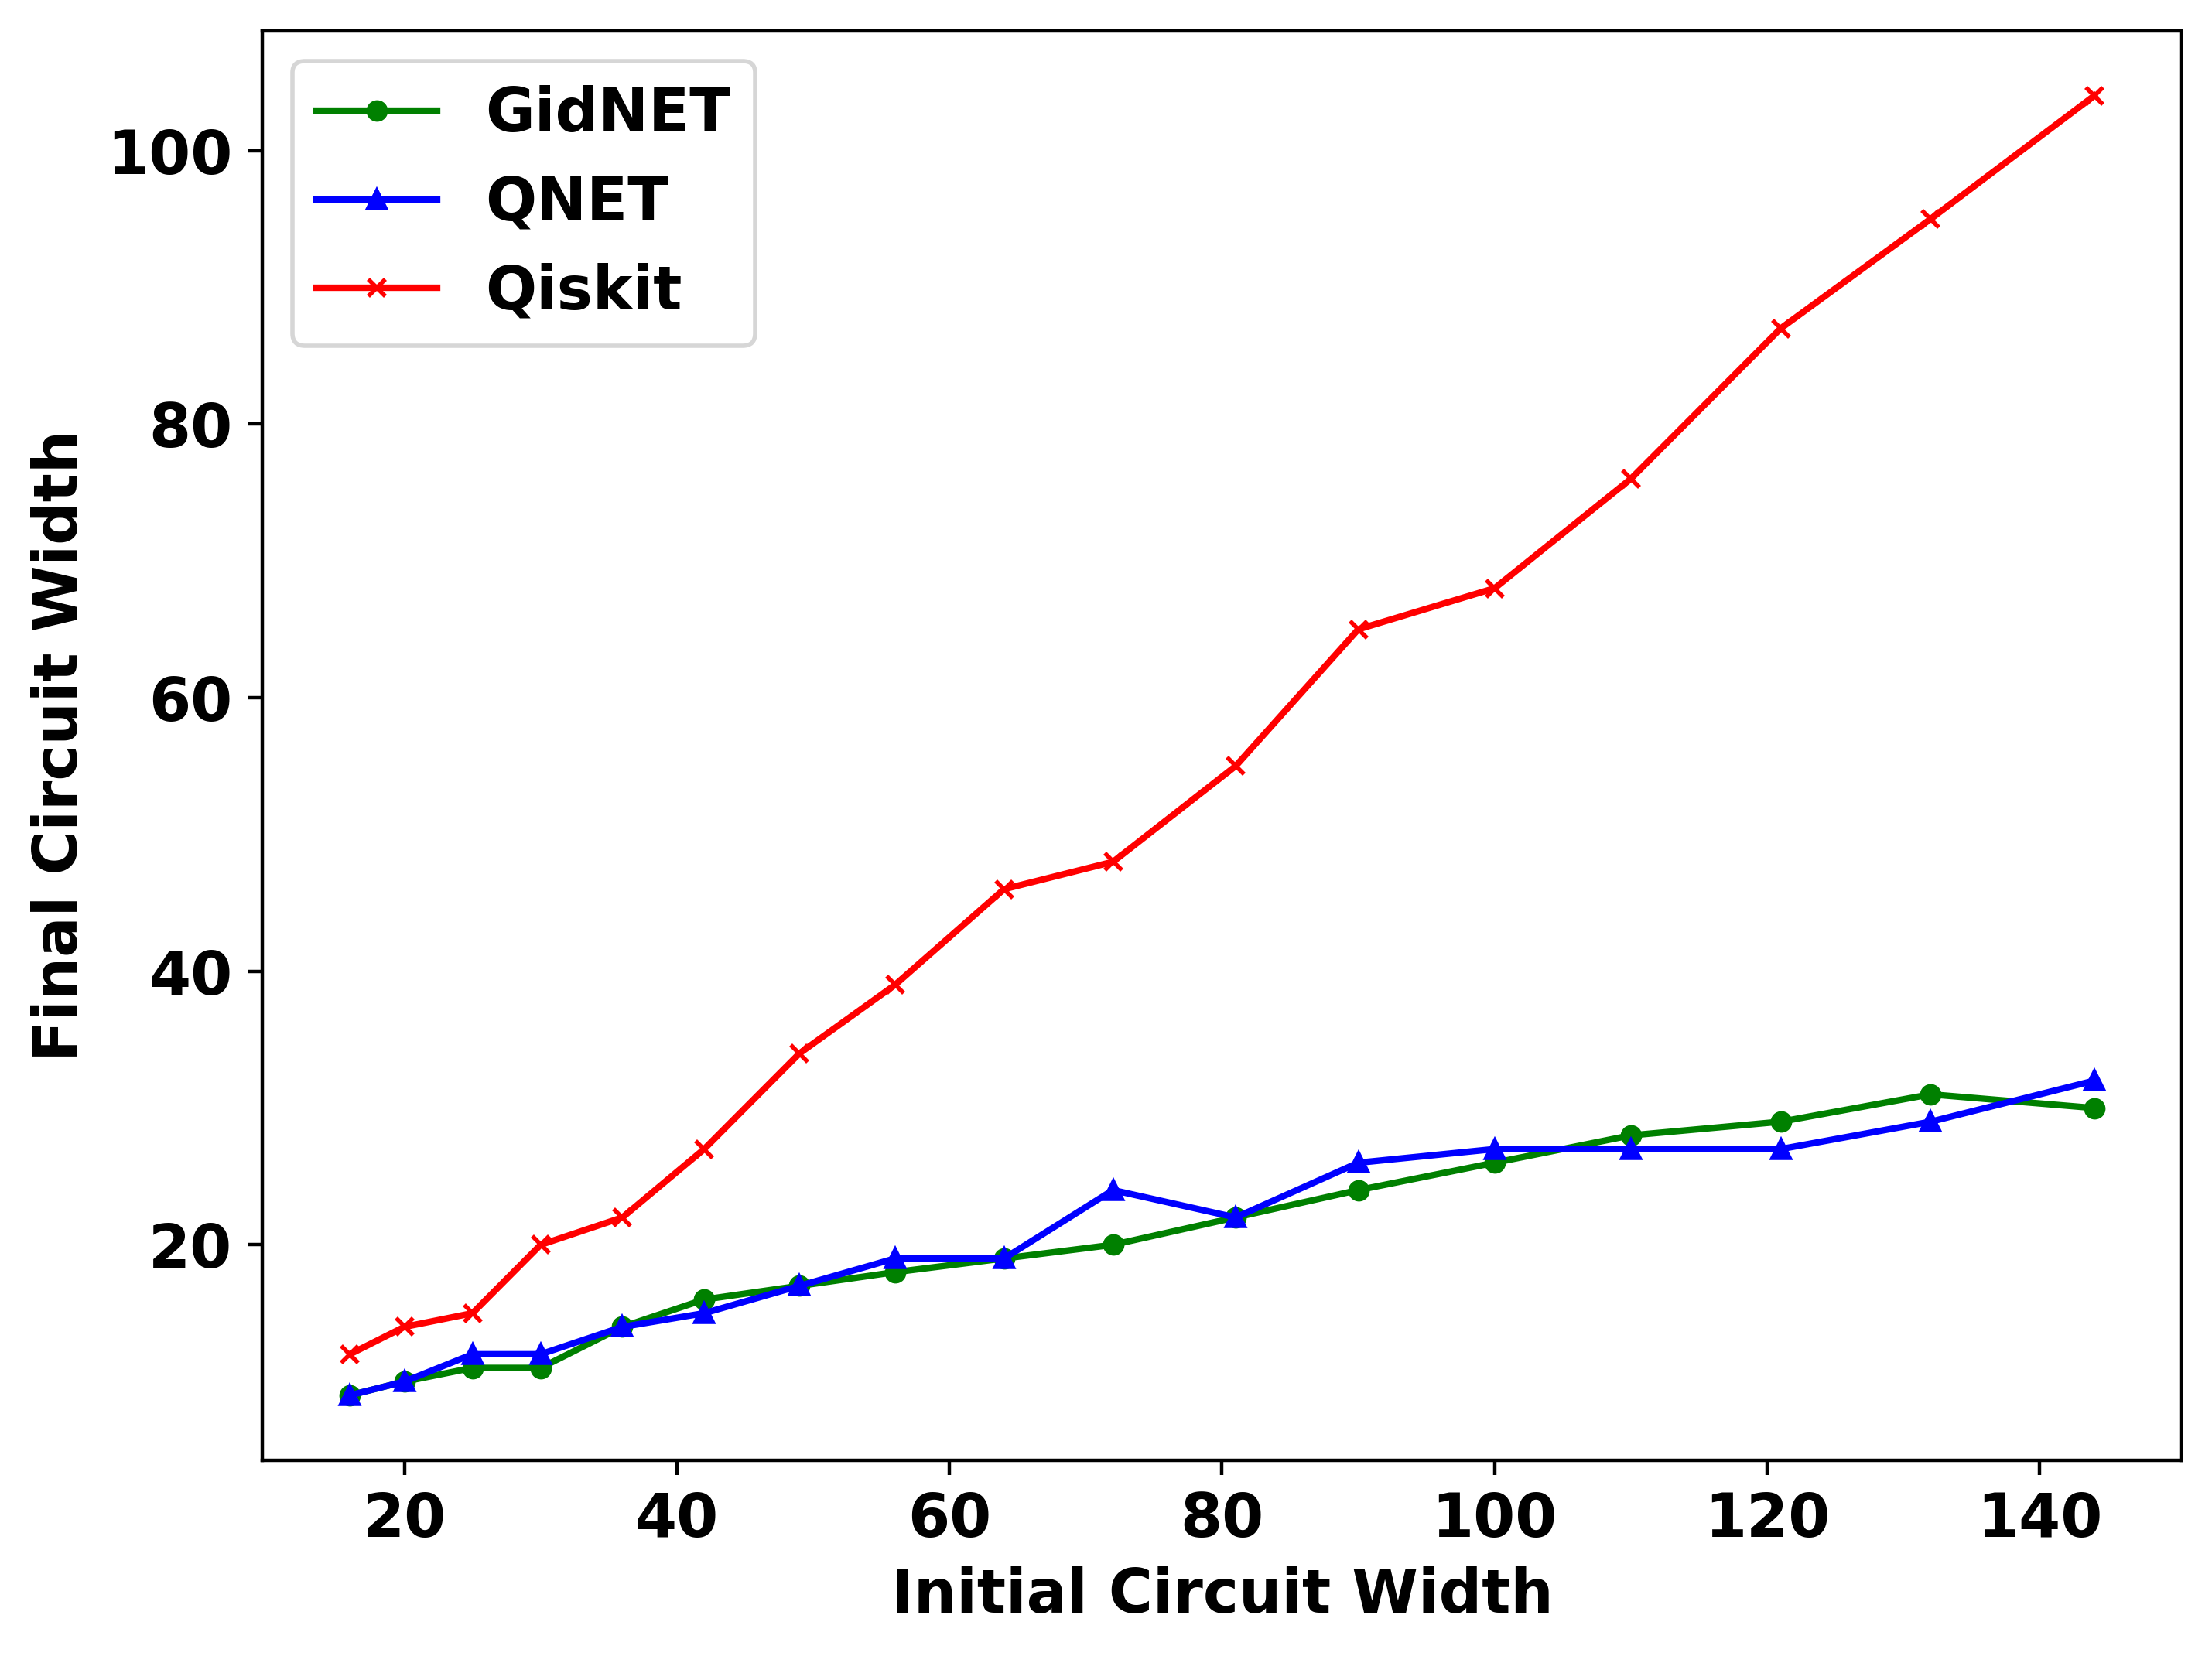

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data_path = 'data_supremacy_cct/combined_v02_width_and_runtime_supremacy_cct_cycle_10_data.csv'
df = pd.read_csv(data_path)

# Adjust the figure size and set DPI for higher quality output
plt.figure(figsize=(8, 6), dpi=400)  # Adjusted size to suit typical LaTeX document width

# Plot for deterministic method
plt.plot(df["Circuit Sizes"], df["GidNET Width"], label='GidNET', marker='o', color="green", linestyle='-', markersize=4)

# Plot for QNET
plt.plot(df["Circuit Sizes"], df["QNET Width"], label='QNET', marker='^', color="blue", linestyle='-', markersize=4)

# Plot for random method (Qiskit)
plt.plot(df["Circuit Sizes"], df["Qiskit Width"], label='Qiskit', marker='x', color="red", linestyle='-', markersize=4)

# Adding titles and labels with increased font size for better readability
# plt.title('Comparison of GidNET, QNET, and Qiskit Qubit Reuse \n Algorithms for GRCS Circuits', fontsize=14, fontweight='bold')
plt.xlabel('Initial Circuit Width', fontsize=14, fontweight='bold')
plt.ylabel('Final Circuit Width', fontsize=14, fontweight='bold')
plt.legend(prop={'size': 14, 'weight': 'bold'})

plt.xticks(fontweight='bold', fontsize=14)
plt.yticks(fontweight='bold', fontsize=14)

# Show grid
# plt.grid(True)

# Save figure to a file
# fig_path = 'QNET_runtime.png'
fig_path = 'plots_supremacy_cct/GidNET_v02_QNET_and_Qiskit_initial_vs_final_supremacy_circuit_cycle_10_sizes.pdf'
plt.savefig(fig_path)

# Display the plot
plt.show()



/tmp/ipykernel_50296/3258482231.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(df["Circuit Sizes"], df["GidNET Average Runtime"], yerr=df["GidNET Stdev Runtime"], label='GidNET Experimental', marker='o', color="green", fmt='-o', capsize=5)
/tmp/ipykernel_50296/3258482231.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-^" (-> marker='^'). The keyword argument will take precedence.
  plt.errorbar(df["Circuit Sizes"], df["QNET Average Runtime"], yerr=df["QNET Stdev Runtime"], label='QNET Experimental', marker='^', color="blue", fmt='-^', capsize=5)
/tmp/ipykernel_50296/3258482231.py:33: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-x" (-> marker='x'). The keyword argument will take precedence.
  plt.errorbar(df["Circuit Sizes"], df["Qiskit Average Run

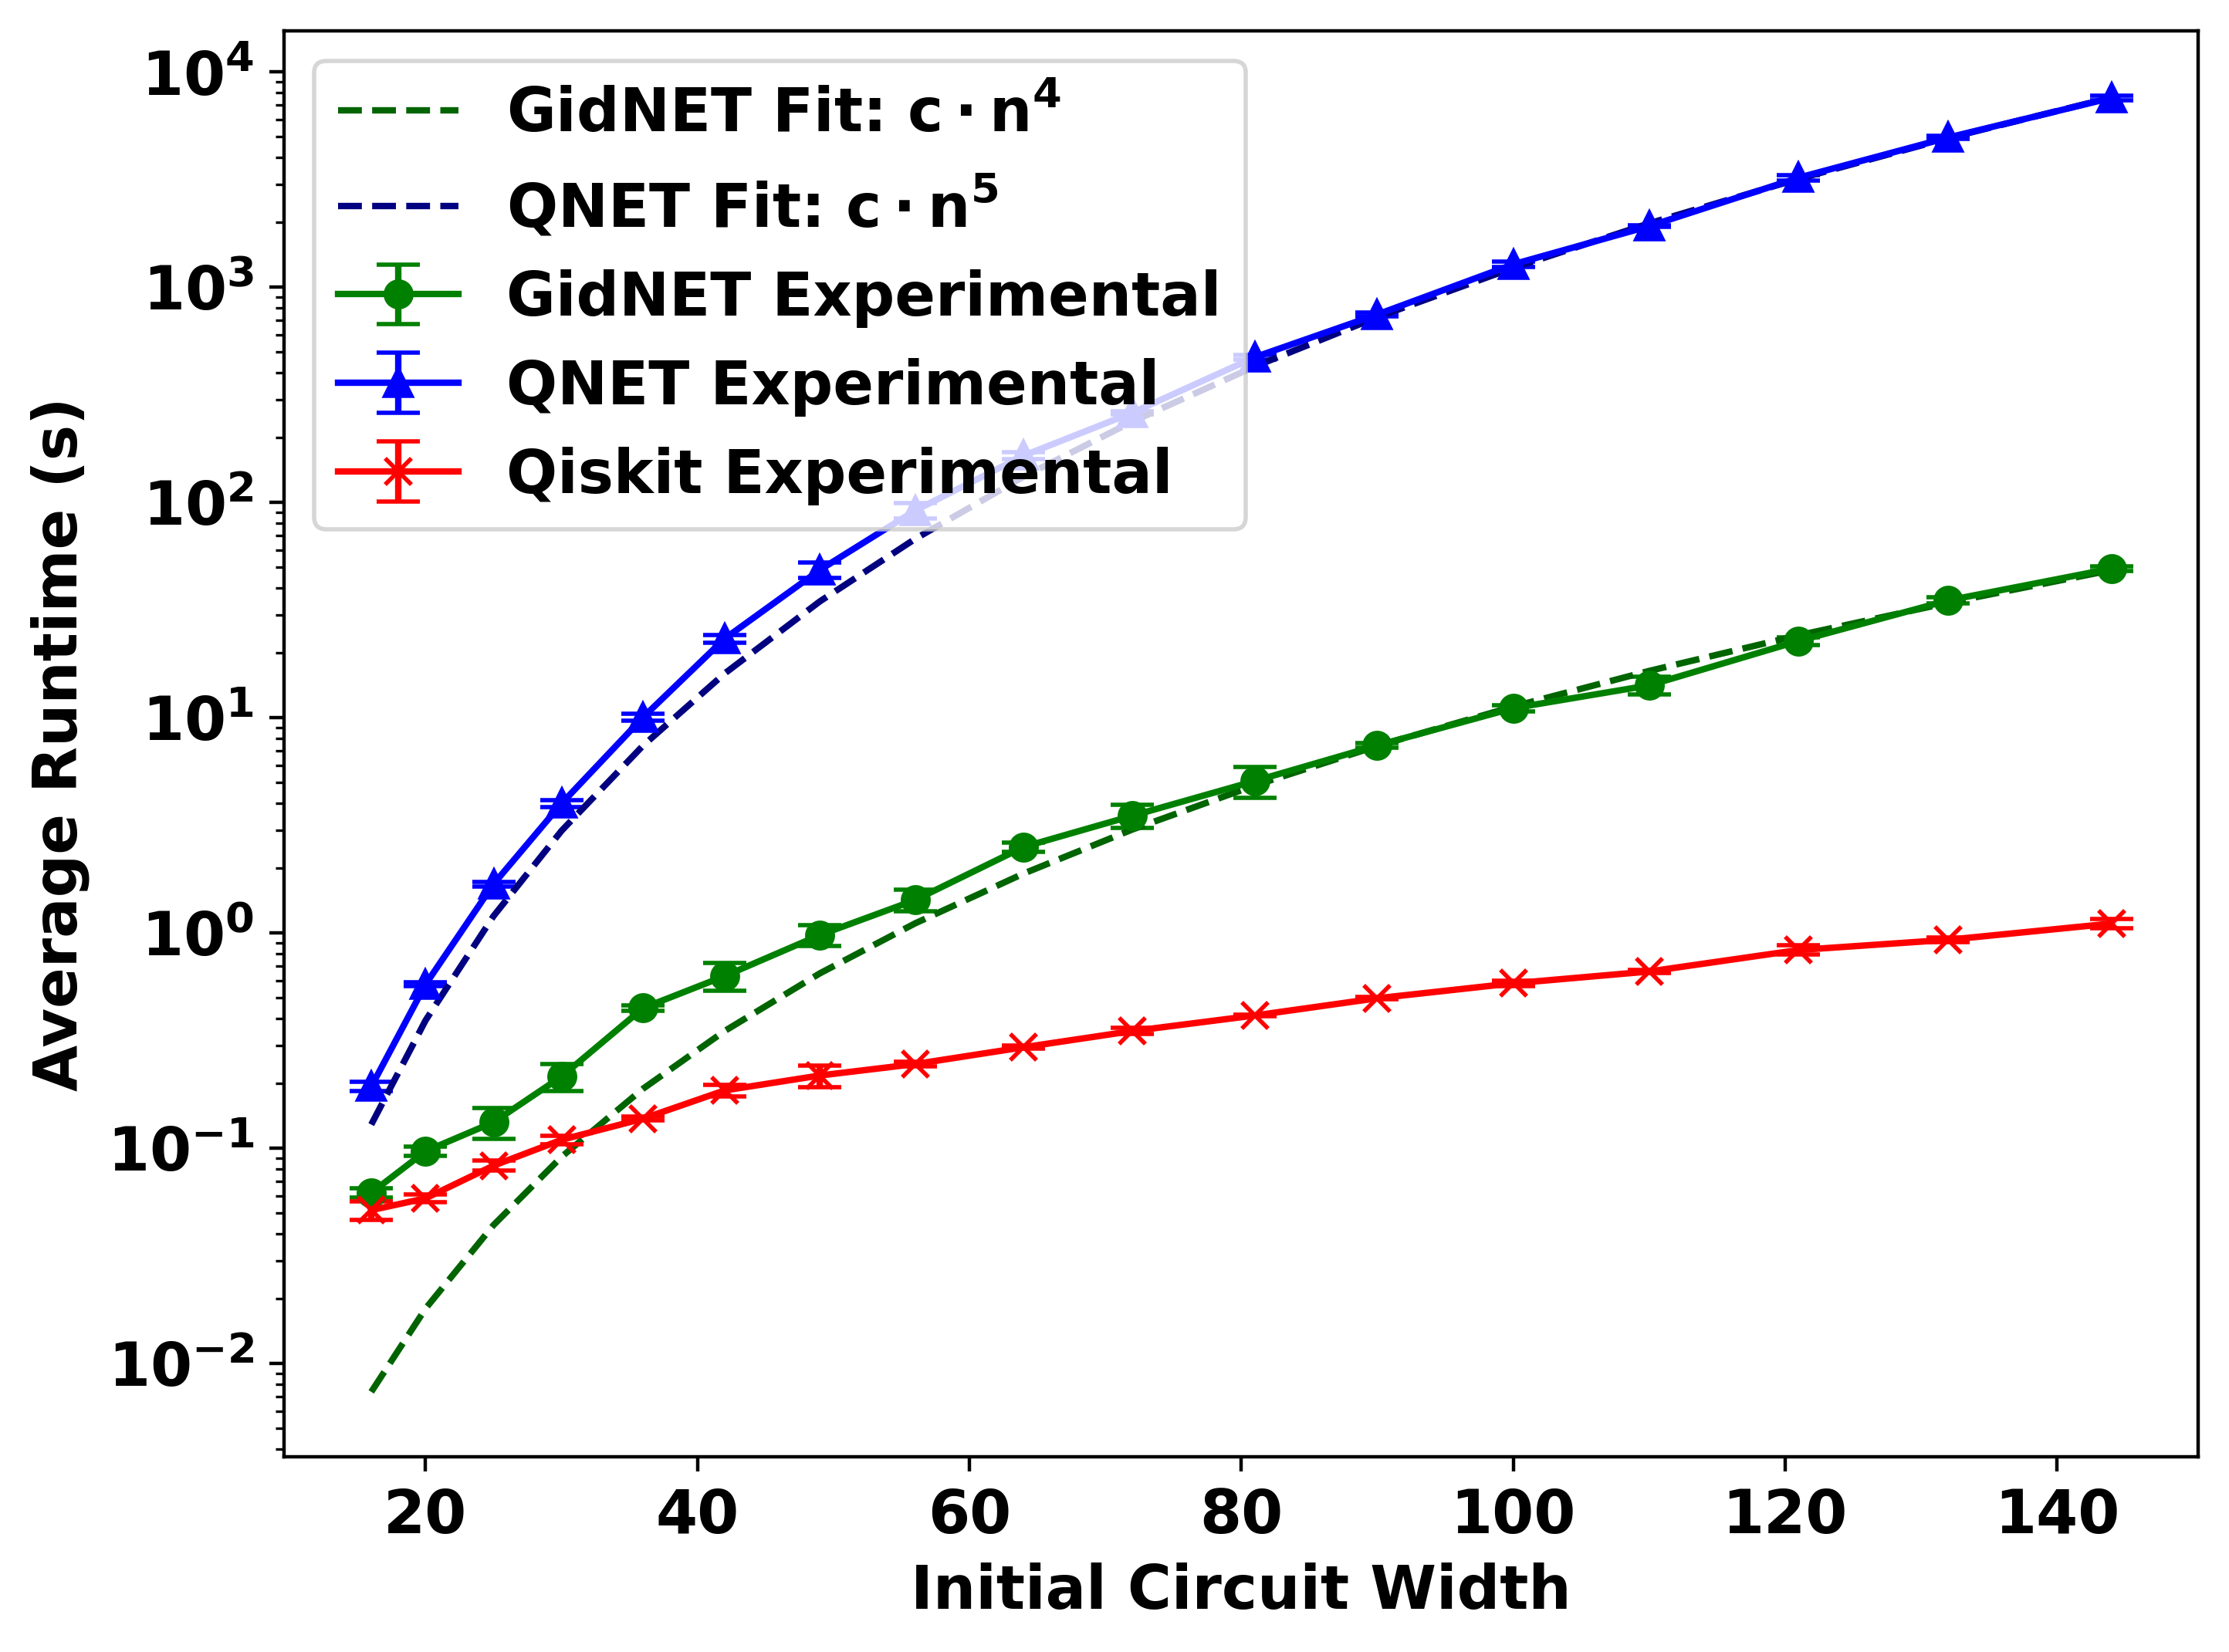

In [12]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np

# Load the data
data_path = 'data_supremacy_cct/combined_v02_width_and_runtime_supremacy_cct_cycle_10_data.csv'
df = pd.read_csv(data_path)

# Define model functions
def model_gidnet(n, c):
    return c * n**4

def model_qnet(n, c):
    return c * n**5

# Curve fitting for GidNET and QNET
popt_gidnet, _ = curve_fit(model_gidnet, df["Circuit Sizes"], df["GidNET Average Runtime"])
popt_qnet, _ = curve_fit(model_qnet, df["Circuit Sizes"], df["QNET Average Runtime"])

# Adjust the figure size and set DPI for higher quality output
plt.figure(figsize=(8, 6), dpi=400)  # Adjusted size to suit typical LaTeX document width

# Plot for GidNET with error bars and fit
plt.errorbar(df["Circuit Sizes"], df["GidNET Average Runtime"], yerr=df["GidNET Stdev Runtime"], label='GidNET Experimental', marker='o', color="green", fmt='-o', capsize=5)
plt.plot(df["Circuit Sizes"], model_gidnet(df["Circuit Sizes"], *popt_gidnet), color="darkgreen", linestyle='--', label=r'GidNET Fit: $\mathbf{c \cdot n^4}$')

# Plot for QNET with error bars and fit
plt.errorbar(df["Circuit Sizes"], df["QNET Average Runtime"], yerr=df["QNET Stdev Runtime"], label='QNET Experimental', marker='^', color="blue", fmt='-^', capsize=5)
plt.plot(df["Circuit Sizes"], model_qnet(df["Circuit Sizes"], *popt_qnet), color="navy", linestyle='--', label=r'QNET Fit: $\mathbf{c \cdot n^5}$')

# Plot for Qiskit with error bars only (no fit)
plt.errorbar(df["Circuit Sizes"], df["Qiskit Average Runtime"], yerr=df["Qiskit Stdev Runtime"], label='Qiskit Experimental', marker='x', color="red", fmt='-x', capsize=5)

# Adding titles and labels with increased font size for better readability
# plt.title('Comparison of GidNET, QNET, and Qiskit Average Runtime \n for GRCS Circuits', fontsize=14, fontweight='bold')
plt.xlabel('Initial Circuit Width', fontsize=14, fontweight='bold')
plt.ylabel('Average Runtime (s)', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=14)
plt.yticks(fontweight='bold', fontsize=14)
plt.legend(prop={'size': 14, 'weight': 'bold'})

# Setting y-axis to logarithmic scale
plt.yscale('log')

# Save the figure as a PDF file for high-quality vector graphics
fig_path = 'plots_supremacy_cct/GidNET_v02_QNET_and_Qiskit_supremacy_cycle_10_initial_circuit_width_vs_average_runtime_per_shot_logplot.pdf'
plt.savefig(fig_path, format='pdf', bbox_inches='tight')

# Display the plot
plt.show()


### F-test and R-squared values

In [62]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Define your circuit sizes and corresponding theoretical and experimental values
circuit_size = np.array(df["Circuit Sizes"])
theoretical_values = np.array(model_gidnet(df["Circuit Sizes"], *popt_gidnet))
experimental_values = np.array(df["GidNET Average Runtime"])

# Fit the polynomial regression
degree=4
poly_features = PolynomialFeatures(degree)
X_poly = poly_features.fit_transform(circuit_size.reshape(-1, 1))
model = LinearRegression().fit(X_poly, experimental_values)
predicted_values = model.predict(X_poly)

# Calculate R-squared value
r_squared = r2_score(experimental_values, predicted_values)

# Compute the F-statistic
n = len(circuit_size)
k = degree + 1  # Degree of polynomial + 1 (for the intercept)
f_statistic = (r_squared / (1 - r_squared)) * ((n - k - 1) / k)

print("R-squared value:", r_squared)
print("F-statistic:", f_statistic)


R-squared value: 0.9986197979849826
F-statistic: 1591.7695610227167


In [14]:
# Define your circuit sizes and corresponding theoretical and experimental values
circuit_size = np.array(df["Circuit Sizes"])
theoretical_values = np.array(model_qnet(df["Circuit Sizes"], *popt_qnet))
experimental_values = np.array(df["QNET Average Runtime"])


# Fit the polynomial regression
degree=5
poly_features = PolynomialFeatures(degree)
X_poly = poly_features.fit_transform(circuit_size.reshape(-1, 1))
model = LinearRegression().fit(X_poly, experimental_values)
predicted_values = model.predict(X_poly)

# Calculate R-squared value
r_squared = r2_score(experimental_values, predicted_values)

# Compute the F-statistic
n = len(circuit_size)
k = degree + 1  # Degree of polynomial + 1 (for the intercept)
f_statistic = (r_squared / (1 - r_squared)) * ((n - k - 1) / k)

print("R-squared value:", r_squared)
print("F-statistic:", f_statistic)

R-squared value: 0.9998901428202023
F-statistic: 15169.546263935143


### GidNET Speedup

#### Geometric mean speedup

In [4]:
import pandas as pd
import numpy as np

# Load the data
data_path = 'data_supremacy_cct/combined_v02_width_and_runtime_supremacy_cct_cycle_10_data.csv'
data = pd.read_csv(data_path)

# Calculate the individual speedups
speedup_vs_qnet = data['QNET Average Runtime'] / data['GidNET Average Runtime']
# speedup_vs_qiskit = data['Qiskit Average Runtime'] / data['GidNET Average Runtime']
speedup_vs_qiskit = data['GidNET Average Runtime'] / data['Qiskit Average Runtime']

# Calculate the geometric mean of the speedups
geo_mean_speedup_vs_qnet = np.prod(speedup_vs_qnet) ** (1 / len(speedup_vs_qnet))
geo_mean_speedup_vs_qiskit = np.prod(speedup_vs_qiskit) ** (1 / len(speedup_vs_qiskit))

# Calculate the percentage execution time reduction
percent_reduction_vs_qnet = 100 * (1 - 1 / geo_mean_speedup_vs_qnet)
percent_reduction_vs_qiskit = 100 * (1 - 1 / geo_mean_speedup_vs_qiskit)

# Create a summary DataFrame
performance_improvement_geo_mean = pd.DataFrame({
    'Geometric Mean Speedup vs QNET (X)': [geo_mean_speedup_vs_qnet],
    'Percentage Execution Time Reduction vs QNET (%)': [percent_reduction_vs_qnet],
    'Geometric Mean Speedup vs Qiskit (X)': [geo_mean_speedup_vs_qiskit],
    'Percentage Execution Time Reduction vs Qiskit (%)': [percent_reduction_vs_qiskit]
})

performance_improvement_geo_mean


,Geometric Mean Speedup vs QNET (X),Percentage Execution Time Reduction vs QNET (%),Geometric Mean Speedup vs Qiskit (X),Percentage Execution Time Reduction vs Qiskit (%)
0,46.911127,97.86831,7.340007,86.376034


In [3]:
import pandas as pd
import numpy as np

# Load the data
data_path = 'data_supremacy_cct/combined_v02_width_and_runtime_supremacy_cct_cycle_10_data.csv'
data = pd.read_csv(data_path)

# Calculate the individual speedups for width
speedup_width_vs_qnet = data['QNET Width'] / data['GidNET Width']
speedup_width_vs_qiskit = data['Qiskit Width'] / data['GidNET Width']

# Calculate the geometric mean of the speedups for width
geo_mean_speedup_width_vs_qnet = np.prod(speedup_width_vs_qnet) ** (1 / len(speedup_width_vs_qnet))
geo_mean_speedup_width_vs_qiskit = np.prod(speedup_width_vs_qiskit) ** (1 / len(speedup_width_vs_qiskit))

# Calculate the percentage width reduction
percent_width_reduction_vs_qnet = 100 * (1 - 1 / geo_mean_speedup_width_vs_qnet)
percent_width_reduction_vs_qiskit = 100 * (1 - 1 / geo_mean_speedup_width_vs_qiskit)

# Create a summary DataFrame
width_improvement_geo_mean = pd.DataFrame({
    'Geometric Mean Speedup Width vs QNET': [geo_mean_speedup_width_vs_qnet],
    'Geometric Mean Speedup Width vs Qiskit': [geo_mean_speedup_width_vs_qiskit],
    'Percentage Width Reduction vs QNET (%)': [percent_width_reduction_vs_qnet],
    'Percentage Width Reduction vs Qiskit (%)': [percent_width_reduction_vs_qiskit]
})

width_improvement_geo_mean


,Geometric Mean Speedup Width vs QNET,Geometric Mean Speedup Width vs Qiskit,Percentage Width Reduction vs QNET (%),Percentage Width Reduction vs Qiskit (%)
0,1.021022,2.156928,2.058958,53.637773


#### Arithmetic mean speedup

In [ ]:
### Percentage GidNET is faster than QNET and percentage Qiskit is faster than GidNET

In [54]:
# Load the data
# Load the data
data_path = 'data_supremacy_cct/combined_v02_width_and_runtime_supremacy_cct_cycle_10_data.csv'
data = pd.read_csv(data_path)

# Calculate the percentage reduction in average runtime
runtime_reduction_vs_qnet = (1 - data['GidNET Average Runtime'] / data['QNET Average Runtime']) * 100
# runtime_reduction_vs_qiskit = (1 - data['GidNET Average Runtime'] / data['Qiskit Average Runtime']) * 100
# Note in this case Qiskit is faster
runtime_reduction_vs_qiskit = (1 - data['Qiskit Average Runtime'] / data['GidNET Average Runtime']) * 100

# Calculate the percentage reduction in final circuit width
width_reduction_vs_qnet = (1 - data['GidNET Width'] / data['QNET Width']) * 100
width_reduction_vs_qiskit = (1 - data['GidNET Width'] / data['Qiskit Width']) * 100

# Create a summary DataFrame
performance_improvement = pd.DataFrame({
    'Circuit Sizes': data['Circuit Sizes'],
    'Runtime Reduction vs QNET (%)': runtime_reduction_vs_qnet,
    'Runtime Reduction vs Qiskit (%)': runtime_reduction_vs_qiskit,
    'Width Reduction vs QNET (%)': width_reduction_vs_qnet,
    'Width Reduction vs Qiskit (%)': width_reduction_vs_qiskit
})

performance_improvement




# # Correct the calculation for percentage reductions (especially for extreme values)
# # Runtime reduction should not exceed 100%, as that would imply negative runtimes.
# # Correcting by limiting maximum reduction to 100%
# runtime_reduction_vs_qnet_corrected = runtime_reduction_vs_qnet.clip(upper=100)
# runtime_reduction_vs_qiskit_corrected = runtime_reduction_vs_qiskit.clip(upper=100)

# # Create a summary DataFrame with corrected values
# performance_improvement_corrected = pd.DataFrame({
#     'Circuit Sizes': data['Circuit Sizes'],
#     'Runtime Reduction vs QNET (%)': runtime_reduction_vs_qnet_corrected,
#     'Runtime Reduction vs Qiskit (%)': runtime_reduction_vs_qiskit_corrected,
#     'Width Reduction vs QNET (%)': width_reduction_vs_qnet,
#     'Width Reduction vs Qiskit (%)': width_reduction_vs_qiskit
# })

# performance_improvement_corrected


,Circuit Sizes,Runtime Reduction vs QNET (%),Runtime Reduction vs Qiskit (%),Width Reduction vs QNET (%),Width Reduction vs Qiskit (%)
0,16,67.886735,16.884763,0.000000,25.000000
1,20,83.217536,39.607379,0.000000,28.571429
2,25,92.177238,37.119798,8.333333,26.666667
3,30,94.611307,49.185275,8.333333,45.000000
4,36,95.542581,69.366558,0.000000,36.363636
5,42,97.292880,70.565208,-6.666667,40.740741
6,49,97.986699,77.738761,0.000000,50.000000
7,56,98.448414,82.698774,5.263158,53.846154
8,64,98.478560,88.266567,0.000000,58.695652
9,72,98.658399,90.005122,16.666667,58.333333


In [55]:
performance_improvement["Runtime Reduction vs QNET (%)"].mean()

95.20962206281284

In [56]:
performance_improvement["Runtime Reduction vs Qiskit (%)"].mean()

75.76945250928772

In [37]:
# Load the data
# Load the data
data_path = 'data_supremacy_cct/combined_v02_width_and_runtime_supremacy_cct_cycle_10_data.csv'
data = pd.read_csv(data_path)

# Calculate how many X faster
runtime_reduction_vs_qnet = (data['QNET Average Runtime'] / data['GidNET Average Runtime'])
runtime_reduction_vs_qiskit = (data['GidNET Average Runtime'] / data['Qiskit Average Runtime'])

# Calculate the percentage reduction in final circuit width
width_reduction_vs_qnet = (1 - data['GidNET Width'] / data['QNET Width']) * 100
width_reduction_vs_qiskit = (1 - data['GidNET Width'] / data['Qiskit Width']) * 100

# Create a summary DataFrame with corrected values
performance_improvement_corrected = pd.DataFrame({
    'Circuit Sizes': data['Circuit Sizes'],
    'Runtime Reduction vs QNET (x)': runtime_reduction_vs_qnet,
    'Runtime Reduction vs Qiskit (x)': runtime_reduction_vs_qiskit,
    'Width Reduction vs QNET (%)': width_reduction_vs_qnet,
    'Width Reduction vs Qiskit (%)': width_reduction_vs_qiskit
})

performance_improvement_corrected


,Circuit Sizes,Runtime Reduction vs QNET (x),Runtime Reduction vs Qiskit (x),Width Reduction vs QNET (%),Width Reduction vs Qiskit (%)
0,16,3.113978,1.203149,0.000000,25.000000
1,20,5.958601,1.655831,0.000000,28.571429
2,25,12.783209,1.590326,8.333333,26.666667
3,30,18.557374,1.967934,8.333333,45.000000
4,36,22.434506,3.264406,0.000000,36.363636
5,42,36.939633,3.397340,-6.666667,40.740741
6,49,49.669669,4.492113,0.000000,50.000000
7,56,64.450196,5.779937,5.263158,53.846154
8,64,65.727203,8.522655,0.000000,58.695652
9,72,74.537806,10.005124,16.666667,58.333333


In [46]:
performance_improvement_corrected["Runtime Reduction vs QNET (x)"].mean()

72.68610097738167

In [47]:
performance_improvement_corrected["Runtime Reduction vs Qiskit (x)"].mean()

12.879430565026919

In [48]:
performance_improvement_corrected["Width Reduction vs QNET (%)"].mean()

1.8569513601274048

In [49]:
performance_improvement_corrected["Width Reduction vs Qiskit (%)"].mean()

51.55329819206677

In [50]:
# Calculate the average improvement of GidNET over QNET and Qiskit in terms of runtime
gidnet_faster_than_qnet = (data['QNET Average Runtime'] - data['GidNET Average Runtime']) / data['QNET Average Runtime']
# gidnet_faster_than_qiskit = (data['Qiskit Average Runtime'] - data['GidNET Average Runtime']) / data['Qiskit Average Runtime']
# Calculate how much faster Qiskit is compared to GidNET in percentage terms
qiskit_faster_than_gidnet = (data['GidNET Average Runtime'] - data['Qiskit Average Runtime']) / data['GidNET Average Runtime']



average_improvement_qnet = gidnet_faster_than_qnet.mean() * 100
# average_improvement_qiskit = gidnet_faster_than_qiskit.mean() * 100
average_faster_qiskit = qiskit_faster_than_gidnet.mean() * 100

average_improvement_qnet, average_faster_qiskit


(95.20962206281283, 75.7694525092877)

In [51]:
# Re-load the data from the newly provided file path and calculate the circuit width differences
# file_path_new = '/mnt/data/combined_width_and_runtime_cutqc_supremacy_data.csv'
# data_new = pd.read_csv(file_path_new)

# Calculate the percentage improvements in circuit width for GidNET compared to QNET and Qiskit
gidnet_better_than_qnet_width_new = ((data['QNET Width'] - data['GidNET Width']) / data['QNET Width']) 
gidnet_better_than_qiskit_width_new = ((data['Qiskit Width'] - data['GidNET Width']) / data['Qiskit Width']) 

average_better_width_qnet_new = gidnet_better_than_qnet_width_new.mean() * 100
average_better_width_qiskit_new = gidnet_better_than_qiskit_width_new.mean() * 100

average_better_width_qnet_new, average_better_width_qiskit_new


(1.8569513601274037, 51.55329819206676)